<a href="https://colab.research.google.com/github/4GeeksAcademy/Regresion-Regularizada-python-template/blob/main/Regresion_Regularizada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Limipar este dataframe y crear otro en condiciones jeje

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

In [4]:
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

 Variables: https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/data_dict.csv

In [5]:
data.shape

(3140, 108)

3140 filas y 108 columnas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [7]:
data = data.drop_duplicates().reset_index(drop = True)
data.shape

(3140, 108)

No habia duplicados

Quiero ver la variable state_name

In [8]:
valores_unicos = data['STATE_NAME'].unique()

print(valores_unicos)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Me quedo con esta variable categórica, son los estado de EEUU y lo voy a dividir en 4 regiones, y añado la variable region

La Oficina del Censo de los Estados Unidos define cuatro regiones y nueve divisiones oficiales a efectos estadísticos,y es el sistema de clasificación generalmente más utilizado:

Región 1 (Región Noreste)

Connecticut
Maine
Massachusetts
Nuevo Hampshire
Rhode Island
Vermont
Nueva Jersey
Nueva York
Pensilvania

Región 2 (Región Medio Oeste)

Illinois
Indiana
Míchigan
Ohio
Wisconsin
Dakota del Norte
Dakota del Sur
Iowa
Kansas
Minesota
Misuri
Nebraska

Región 3 (Región Sur)

Carolina del Norte
Carolina del Sur
Delaware
Distrito de Columbia
Florida
Georgia
Maryland
Virginia
Virginia Occidental
Alabama
Kentucky
Misisipi
Tennessee
Arkansas
Luisiana
Oklahoma
Texas

Región 4 (Región Oeste)

Arizona
Colorado
Idaho
Montana
Nevada
Nuevo México
Utah
Wyoming
Alaska
California
Hawái
Oregón
Washington

In [56]:
# Agrupar el DataFrame por la columna 'STATE_NAME'
grupos_estados = data.groupby('STATE_NAME')

# Crear un diccionario para almacenar los DataFrames divididos por estado
dataframes_por_estado = {}

# Iterar sobre los grupos y almacenar los DataFrames en el diccionario
for estado, grupo in grupos_estados:
    dataframes_por_estado[estado] = grupo



In [55]:


# Definir el diccionario de regiones
regiones = {
    'Noreste': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pensilvania'],
    'Medio oeste': ['Ohio', 'Michigan', 'Indiana', 'Wisconsin', 'Illinois', 'Minnesota', 'Iowa', 'Misuri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'Sur': ['Delaware', 'Maryland', 'Virginia', 'Virginia Occidental', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Misisipi', 'Luisiana', 'Arkansas', 'Texas', 'Oklahoma'],
    'Oeste': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'District of Columbia', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawai']
}

# Invertir el diccionario de regiones para tener un mapeo de estado a región
estado_a_region = {estado: region for region, estados in regiones.items() for estado in estados}

# Crear una nueva columna 'Región' en el DataFrame
data['Región'] = data['STATE_NAME'].map(estado_a_region)

# Agrupar el DataFrame por la columna 'Región'
grupos_regiones = data.groupby('Región')

# Crear un diccionario para almacenar los DataFrames divididos por región
dataframes_por_region = {}

# Iterar sobre los grupos y almacenar los DataFrames en el diccionario
for region, grupo in grupos_regiones:
    dataframes_por_region[region] = grupo




In [54]:


# Separar el DataFrame en cuatro DataFrames basados en la región
data_noreste = data[data['Región'] == 'Noreste']
data_medio_oeste = data[data['Región'] == 'Medio oeste']
data_sur = data[data['Región'] == 'Sur']
data_oeste = data[data['Región'] == 'Oeste']

# Concatenar los DataFrames en uno solo
data_final = pd.concat([data_noreste, data_medio_oeste, data_sur, data_oeste])

# Restablecer el índice del DataFrame resultante
data_final.reset_index(drop=True, inplace=True)

In [53]:
data_final.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,10-19,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Región
0,9001,943823,108385,11.483615,129955,13.769001,112617,11.932004,113230,11.996953,125353,13.281410,143173,15.169476,106677,11.302649,62683,6.641394,41750,4.423499,742641,78.684351,120100,12.724844,4887,0.517788,54887,5.815391,1019,0.107965,20289,2.149662,943823,366,19596,10.3,7.5,2.8,5.1,-7.6,-2.5,64890,139001,133981,303918,10.1,21.7,20.9,47.4,92971,10.0,12.7,12.2,91183,88535,93831,480767,461750,19017,4.0,91183,119.4,352.1,302.9,105.7,93.7,8.6,7.1,853.298109,427.969950,8.453727,1027.392058,206.852142,2275.901923,173,947328,197334,20.8,Fairfield,Connecticut,9,1,731785,31.7,30.0,33.4,231953,23.2,22.3,24.2,169774,5.5,4.9,6.1,40301,5.5,4.5,6.5,39898,8.6,7.9,9.3,62779,2.6,2.5,2.8,19329,3,Noreste
1,9003,892697,98354,11.017624,112199,12.568542,116495,13.049781,117045,13.111392,109541,12.270793,127517,14.284466,105187,11.783057,64171,7.188441,42188,4.725904,671681,75.241767,139802,15.660633,5043,0.564917,52233,5.851145,1100,0.123222,22838,2.558315,892697,-234,26012,10.3,9.3,1.0,6.1,-7.4,-1.3,65170,167539,154744,234993,10.5,26.9,24.9,37.8,96957,11.2,15.5,14.8,73037,70717,75357,480319,459939,20380,4.2,73037,95.6,352.1,302.9,105.7,93.7,8.6,7.1,807.075757,404.787222,7.995797,971.739201,195.647157,2152.618467,216,897417,201242,22.4,Hartford,Connecticut,9,3,705393,37.4,35.7,39.0,263554,28.8,27.7,29.8,203153,6.1,5.5,6.7,42859,5.9,5.0,6.9,41736,10.3,9.6,11.0,72956,2.9,2.7,3.1,20145,1,Nores

In [52]:
data_final.shape

(2752, 109)

He perdido casi 400 datos, pero quiero limpiarlo, voy a seguir Cesar

In [51]:
conteo_region = data_final.groupby('Región').size()

print(conteo_region)

Región
Medio oeste     940
Noreste         150
Oeste           442
Sur            1220
dtype: int64


Ya tengo esa variable incluida, Region.

In [50]:

column_names = data_final.columns.tolist()
print(column_names)


['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '10-19', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with less

Ahora voy a seleccionar las variables que quiero incluir en mi analisis y crear un nuevo dataframe y cambiar el nombre de una que esta erronea

In [49]:

# Cambiar el nombre de la columna '19-Oct' a '10-19'
data_final = data_final.rename(columns={'19-Oct': '10-19'})

# Seleccionar las columnas deseadas para el nuevo DataFrame
columnas_deseadas = [
    'Región', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
]

# Crear el nuevo DataFrame con las columnas seleccionadas
total_data = data_final[columnas_deseadas].copy()

print(total_data)



       Región  CKD_number  diabetes_number  COPD_number  Heart disease_number  \
0     Noreste       19329            62779        39898                 40301   
1     Noreste       20145            72956        41736                 42859   
2     Noreste        4233            13700         9762                 10150   
3     Noreste        3637            12051         7922                  8502   
4     Noreste       19430            73592        43306                 44330   
...       ...         ...              ...          ...                   ...   
2747    Oeste         821             2834         2098                  1862   
2748    Oeste         447             1360          928                   981   
2749    Oeste         430             1500         1163                  1034   
2750    Oeste         207              686          506                   500   
2751    Oeste         185              644          480                   471   

      Obesity_number     0-

In [16]:
data.rename(columns={'19-Oct': '10-19'}, inplace=True)

# 2.Analisis Exploratorio

In [42]:
total_data.shape

(2752, 15)

In [43]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Región                2752 non-null   object
 1   CKD_number            2752 non-null   int64 
 2   diabetes_number       2752 non-null   int64 
 3   COPD_number           2752 non-null   int64 
 4   Heart disease_number  2752 non-null   int64 
 5   Obesity_number        2752 non-null   int64 
 6   0-9                   2752 non-null   int64 
 7   10-19                 2752 non-null   int64 
 8   20-29                 2752 non-null   int64 
 9   30-39                 2752 non-null   int64 
 10  40-49                 2752 non-null   int64 
 11  50-59                 2752 non-null   int64 
 12  60-69                 2752 non-null   int64 
 13  70-79                 2752 non-null   int64 
 14  80+                   2752 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 

In [44]:
total_data = total_data.drop_duplicates().reset_index(drop = True)

In [45]:
total_data.shape

(2752, 15)

No habia duplicados

Univariante categoricas

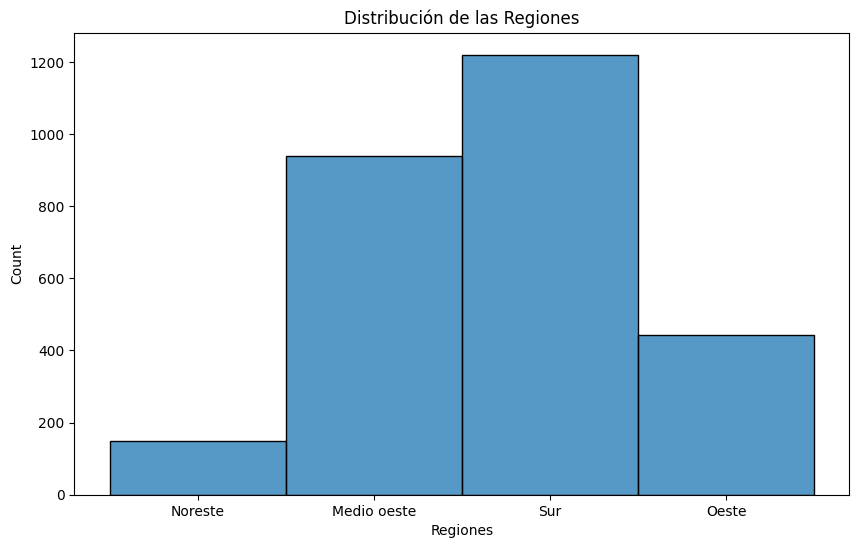

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot( data = total_data, x = "Región")
plt.title('Distribución de las Regiones')
plt.xlabel('Regiones')
plt.show()

La región con mas datos es la sur

Univariante numericas(todas menos las de edad, despues las metere en bivariable)

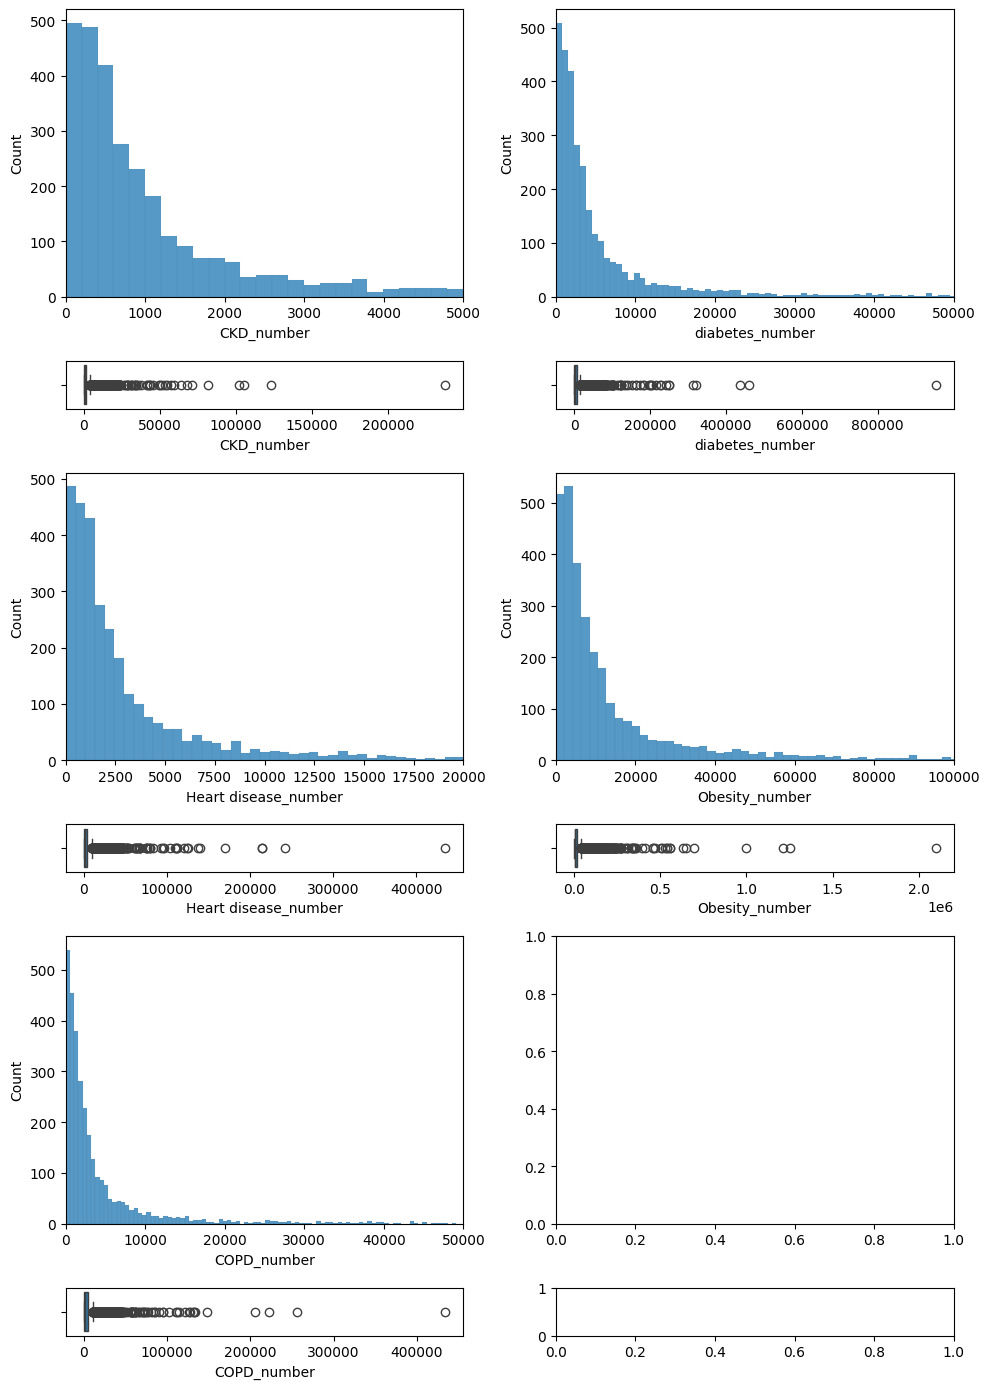

In [85]:
fig, axis = plt.subplots(6, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = data, x = "CKD_number").set_xlim(0, 5000)
sns.boxplot(ax = axis[1, 0], data = data, x = "CKD_number")

sns.histplot(ax = axis[0, 1], data = data, x = "diabetes_number").set_xlim(0, 50000)
sns.boxplot(ax = axis[1,1], data = data, x = "diabetes_number")

sns.histplot(ax = axis[2, 0], data = data, x = "Heart disease_number").set_xlim(0, 20000)
sns.boxplot(ax = axis[3, 0], data = data, x = "Heart disease_number")

sns.histplot(ax = axis[2,1], data = data, x = "Obesity_number").set_xlim(0, 100000)
sns.boxplot(ax = axis[3, 1], data = data, x = "Obesity_number")

sns.histplot(ax = axis[4,0], data = data, x = "COPD_number").set_xlim(0, 50000)
sns.boxplot(ax = axis[5, 0], data = data, x = "COPD_number")




plt.tight_layout()

plt.show()

Tienen una barbaridad de datos atipicos, me lo esperaba Cesar jajajja

Analisis multivariable

Numericas con numericas

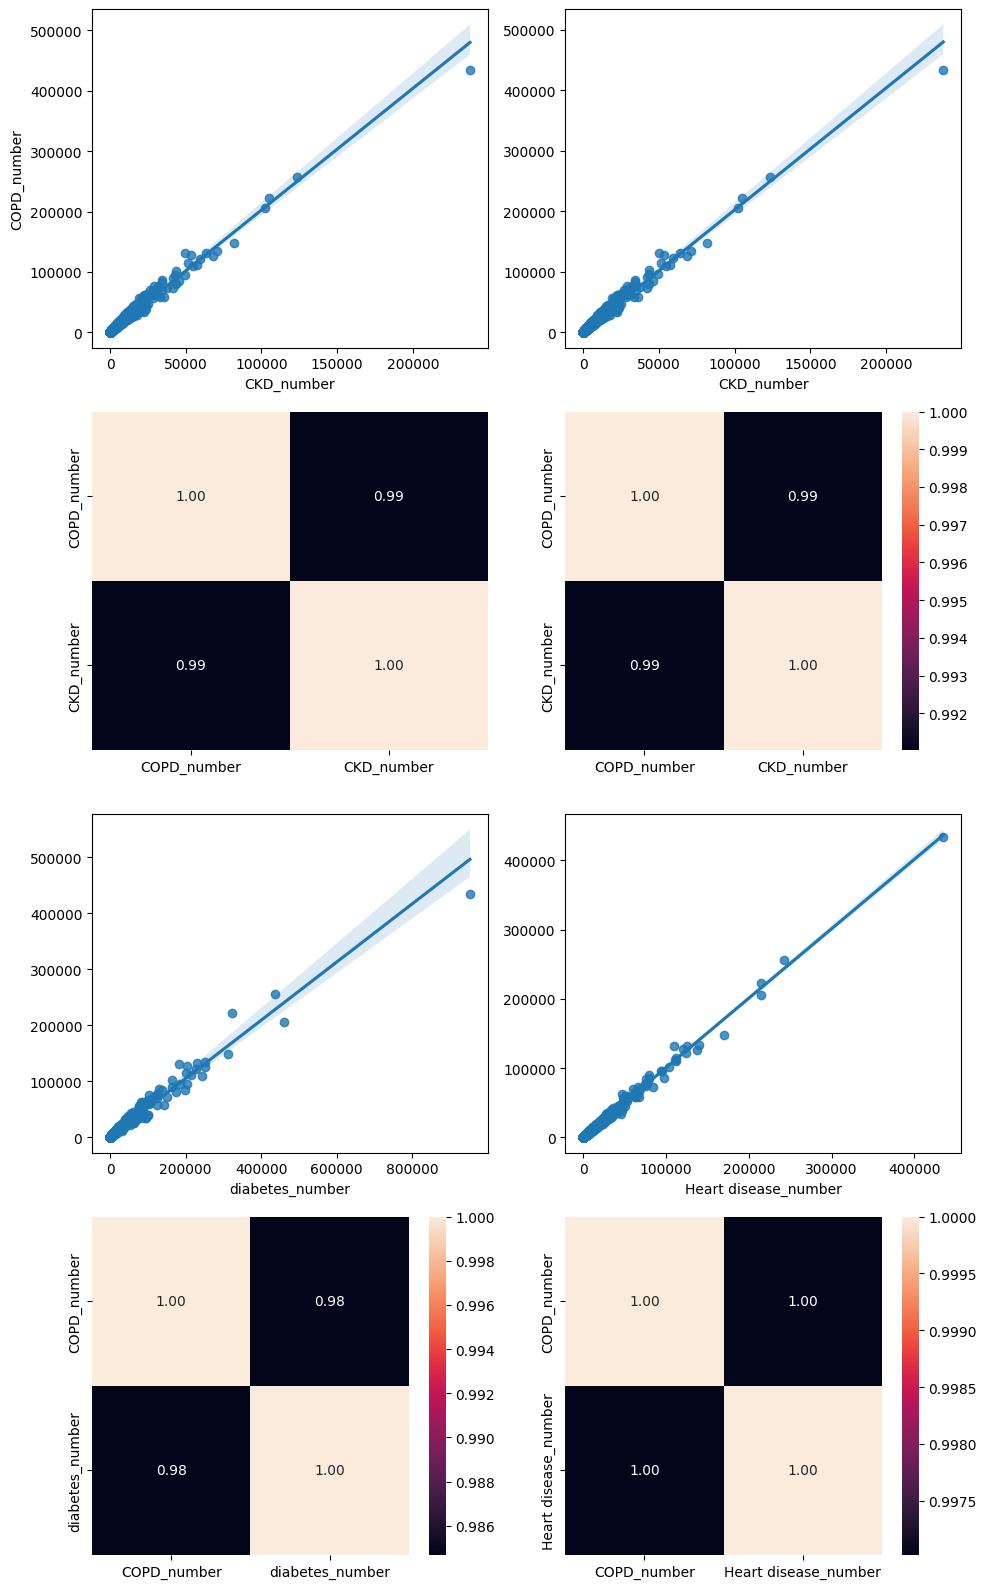

In [102]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "CKD_number", y = "COPD_number")
sns.heatmap(data[["COPD_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "CKD_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "CKD_number"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data, x = "diabetes_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "diabetes_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)

sns.regplot(ax = axis[2, 1], data = data, x = "Heart disease_number", y = "COPD_number").set(ylabel = None)
sns.heatmap(data[["COPD_number", "Heart disease_number"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

La correlacion es exageraisima, pero tambien me lo esperaba y no habeis explicado nada de la multicolinealidad, esto es un claro ejemplo de que el R cuadrado no vale pa na, es orientativo, aver cuando haga el tratamiento de atipicos que pasa. Cesar que amargaera

In [104]:
from sklearn.preprocessing import MinMaxScaler
total_data["Region_n"] = pd.factorize(total_data["Región"])[0]

Analisis categorico completo

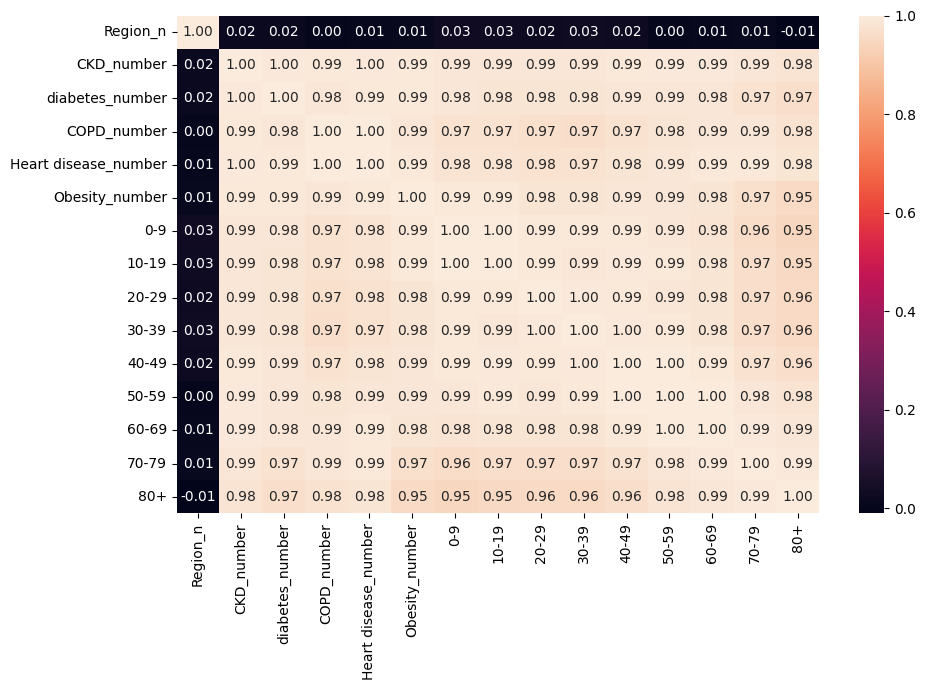

In [107]:
fig, axes = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[[
    'Region_n', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Que barabaridad jajajjaja

In [87]:

num_variables = [
    'Region_n', 'CKD_number', 'diabetes_number', 'COPD_number', 'Heart disease_number', 'Obesity_number',
    '0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'
]

In [89]:

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
data_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
data_scal.head()

,Region_n,CKD_number,diabetes_number,COPD_number,Heart disease_number,Obesity_number,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+
0,0.0,0.081283,0.065910,0.091898,0.092676,0.080909,0.089683,0.104855,0.072312,0.075378,0.092846,0.109617,0.105153,0.109472,0.117185
1,0.0,0.084715,0.076597,0.096133,0.098560,0.096820,0.081381,0.090525,0.074802,0.077918,0.081134,0.097629,0.103684,0.112071,0.118414
2,0.0,0.017791,0.014374,0.022471,0.023329,0.016792,0.013214,0.016726,0.012328,0.012650,0.015890,0.023480,0.027459,0.029384,0.026053
3,0.0,0.015284,0.012643,0.018232,0.019538,0.017279,0.011653,0.015246,0.012325,0.012338,0.014469,0.020399,0.022664,0.024689,0.023970
4,0.0,0.081707,0.077265,0.099750,0.101943,0.100162,0.074667,0.088087,0.075583,0.072502,0.076389,0.093838,0.101532,0.109823,0.112248


In [92]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = data_scal.drop('COPD_number', axis = 1)
y = data_scal['COPD_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 5)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,CKD_number,diabetes_number,Heart disease_number,Obesity_number,60-69
0,0.010283,0.010877,0.012924,0.014138,0.011597
1,0.001464,0.001595,0.001679,0.001424,0.001189
2,0.024899,0.022066,0.025985,0.025120,0.022013
3,0.000639,0.000563,0.000913,0.000698,0.000649
4,0.001548,0.001638,0.002539,0.001860,0.001655


In [93]:
X_train_sel["COPD_number"] = y_train.values
X_test_sel["COPD_number"] = y_test.values
X_train_sel.to_csv("X_train_sel.csv", index = False)
X_test_sel.to_csv("X_test_sel.csv", index = False)

In [94]:
train_data = pd.read_csv("X_train_sel.csv")
test_data = pd.read_csv("X_train_sel.csv")

train_data.head()

,CKD_number,diabetes_number,Heart disease_number,Obesity_number,60-69,COPD_number
0,0.010283,0.010877,0.012924,0.014138,0.011597,0.014362
1,0.001464,0.001595,0.001679,0.001424,0.001189,0.001769
2,0.024899,0.022066,0.025985,0.025120,0.022013,0.024328
3,0.000639,0.000563,0.000913,0.000698,0.000649,0.001048
4,0.001548,0.001638,0.002539,0.001860,0.001655,0.003158


In [95]:
X_train = train_data.drop(["COPD_number"], axis = 1)
y_train = train_data["COPD_number"]
X_test = test_data.drop(["COPD_number"], axis = 1)
y_test = test_data["COPD_number"]

In [96]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 0.00018109183905701785
Coeficientes (b1, b2): [-0.07024996 -0.21242403  1.16412389  0.19419641 -0.11451294]


In [98]:
y_pred = model.predict(X_test)
y_pred

array([0.01361049, 0.00183445, 0.02635228, ..., 0.01993893, 0.0378194 ,
       0.00197995])

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 7.233340335280713e-06
R2 Score: 0.993274551861836


In [108]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train, y_train)

score = lasso_model.score(X_test, y_test)
print("Coeficientes:", lasso_model.coef_)
print("R2 score:", score)

Coeficientes: [0. 0. 0. 0. 0.]
R2 score: 0.0


Lo sabia